In [15]:
#Credit to https://github.com/BYUCamachoLab/ottoeplitz
import matplotlib.pyplot as plt
import numpy as np
import random
import ottoeplitz

""" 
Toeplitz Hashing Example
======================

In this example, we generate a large Gaussian input data set. We plot the data before
and after hashing. The data after hashing should be uniform.

"""

inputdata = []

for i in range(2**16):
    temp = random.gauss(5, .05)
    inputdata.append(temp)
inputdata = np.array(inputdata)

# Function to calculate Shannon entropy
def shannon_entropy(bitstring):
    # Convert bitstring to a numpy array of integers
    bits = np.array([int(bit) for bit in bitstring])
    
    # Calculate the frequency of 0's and 1's
    counts = np.bincount(bits)
    probabilities = counts / len(bits)
    
    # Filter out zero probabilities to avoid log2(0)
    probabilities = probabilities[probabilities > 0]
    
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

def plot_data(data, n):
        """ Bins up data and plots. """
        N, data = ottoeplitz.Toeplitz._calculate_N(data)
        binned_data, bins = np.histogram(data, bins=2**n)
        data_digital = np.digitize(data, bins, right=False)

        #data_digital = np.digitize(data, bins, right=True)
        fig, ax = plt.subplots()
        ax.hist(data_digital,bins=2**n, label='Digitized Raw Data')

        #ax.hist(data_digital,bins, label='Digitized Raw Data')
        plt.xlabel('Random numbers')
        plt.ylabel('Frequency')
        plt.title("Plotting Data Before and After Hashing")
        plt.show()
        return binned_data, data_digital

def int_to_binary_string(n, length):
    n = int(n)
    return f"{n:0{length}b}"
    
def data_to_bitstring(data, N):
    strings = [int_to_binary_string(num, N) for num in data]
    return ''.join(strings)




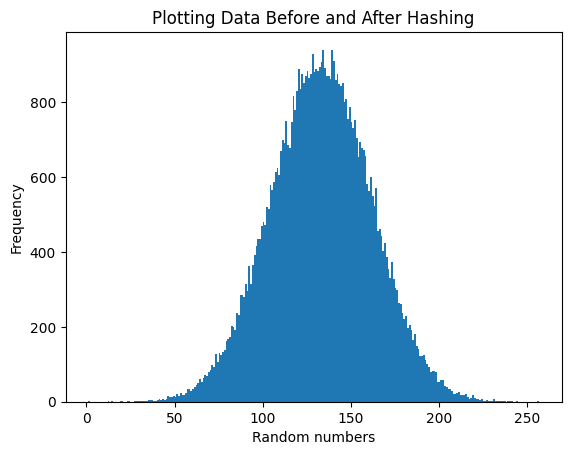

Entropy:  0.6969984211986866
[5.02760261 4.91903723 4.9516555  ... 5.06476034 4.95369758 5.07164378]
outlen 196
outlen 196


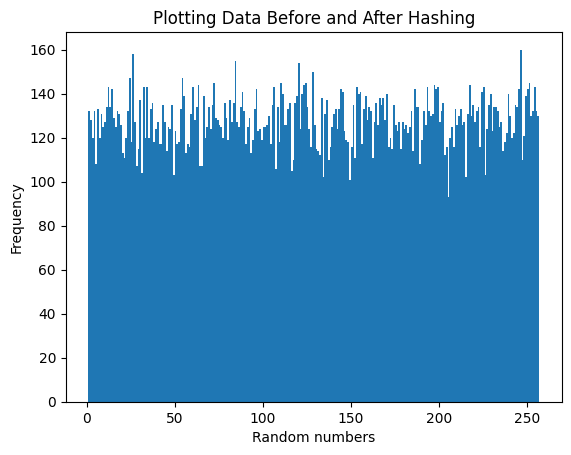

Entropy:  0.9999897381591247


In [19]:
t = ottoeplitz.Toeplitz(inputdata, 8)
plot_data(inputdata, 8)
print("Entropy: ", shannon_entropy(data_to_bitstring(inputdata, 8)))
print(inputdata)
dist = t.hash()
plot_data(dist, 8)
print("Entropy: ", shannon_entropy(data_to_bitstring(dist, 8)))
